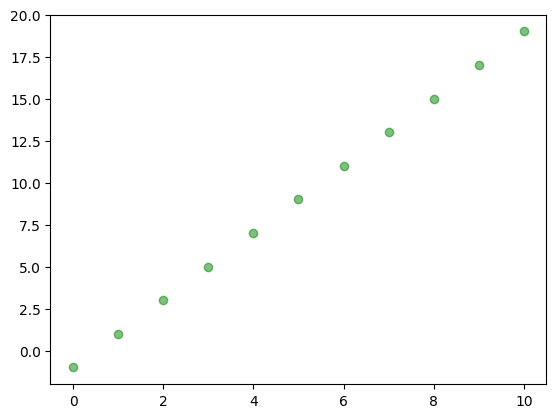

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# zbior danych
x = range(11)
y = [2*xi - 1 for xi in x]
plt.plot(x, y, 'go', label='True data', alpha=0.5)

In [2]:
import torch

class LinearRegression(torch.nn.Module):

    def __init__(self, inputSize, outputSize):
        super(LinearRegression, self).__init__()
        self.layers = torch.nn.Sequential(
            torch.nn.Linear(inputSize, outputSize)
        ) 
        
    def forward(self, x):
        return self.layers(x)

In [3]:
x = np.array(x, dtype=np.float32)
y = np.array(y, dtype=np.float32)

X_train = torch.from_numpy(x).view(-1,1)
y_train = torch.from_numpy(y).view(-1,1)

In [4]:
lr_model = LinearRegression(1,1)

criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(lr_model.parameters(), lr=0.01)

In [5]:
num_params = sum(p.numel() for p in lr_model.parameters() if p.requires_grad)
print(f"liczba trenowalnych parametrów: {num_params}")

liczba trenowalnych parametrów: 2


In [6]:
lr_model.state_dict()

OrderedDict([('layers.0.weight', tensor([[-0.0685]])),
             ('layers.0.bias', tensor([0.9601]))])

In [7]:
epochs = 200
# petla uczaca 
for epoch in range(epochs):
    lr_model.train() # etap trenowania 

    y_pred = lr_model(X_train)
    loss = criterion(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 50 == 0:
        print(f'epoch: {epoch+1:03d}, loss = {loss.item():.2f}')
 
    lr_model.eval() # etap ewaluacji modelu

# po treningu jeszcze raz generujemy predykcje
lr_model.eval()
with torch.no_grad():
    predicted = lr_model(X_train)

epoch: 050, loss = 0.81
epoch: 100, loss = 0.46
epoch: 150, loss = 0.26
epoch: 200, loss = 0.15


In [8]:
print(f"po procesie uczenia waga: {float(lr_model.layers[0].weight[0]):.3f} oraz bias {float(lr_model.layers[0].bias[0]):.3f}")

po procesie uczenia waga: 1.896 oraz bias -0.280


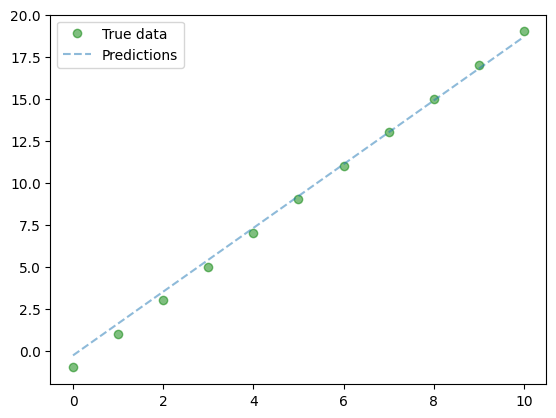

In [9]:
plt.clf()
plt.plot(X_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(X_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

Regresja logistyczna

In [10]:
from sklearn.datasets import make_classification
import numpy as np

# prepare dataset
X, y = make_classification(n_samples=10**4, n_features=10 ,random_state=42)

In [11]:
import torch

class LogisticRegression(torch.nn.Module):

    def __init__(self, inputSize, outputSize):
        super(LogisticRegression, self).__init__()
        self.layers = torch.nn.Sequential(
            torch.nn.Linear(inputSize, outputSize),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        logits = self.layers(x)
        return logits

In [12]:
X_train = torch.from_numpy(X.astype(np.float32))
y_train = torch.from_numpy(y.astype(np.float32))
y_train = y_train.view(y_train.shape[0], 1)

In [13]:
model = LogisticRegression(X_train.shape[1], y_train.shape[1])

learningRate = 0.01
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

# petla uczaca 
num_epochs = 500

for epoch in range(num_epochs):
    # forward pass and loss
    model.train()
    y_predicted = model(X_train)
    loss = criterion(y_predicted, y_train)
    
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    model.eval()

    if (epoch+1) % 50 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')



model.eval()
with torch.no_grad():
    y_predicted = model(X_train)  # no need to call model.forward()
    y_predicted_cls = y_predicted.round()   # round off to nearest class
    acc = y_predicted_cls.eq(y_train).sum() / float(y_train.shape[0])  # accuracy
    print(f'accuracy = {acc:.4f}')
    print(f"predykcja dla pierwszego wiersza: prawdopodobieństwo y=1: {float(y_predicted[0]):.3f}, wartosc prawdziwa: {float(y_train[0]):.3f}")

epoch: 50, loss = 0.6417
epoch: 100, loss = 0.5092
epoch: 150, loss = 0.4443
epoch: 200, loss = 0.4071
epoch: 250, loss = 0.3832
epoch: 300, loss = 0.3666
epoch: 350, loss = 0.3544
epoch: 400, loss = 0.3451
epoch: 450, loss = 0.3377
epoch: 500, loss = 0.3317
accuracy = 0.8836
predykcja dla pierwszego wiersza: prawdopodobieństwo y=1: 0.828, wartosc prawdziwa: 1.000


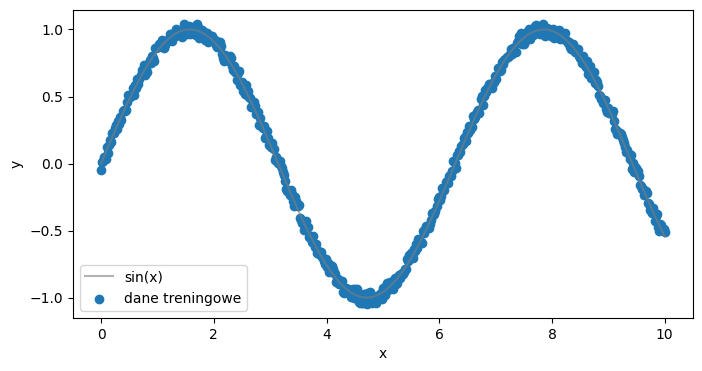

In [14]:
import torch
import pandas as pd 
import matplotlib.pyplot as plt
from IPython.display import clear_output

torch.manual_seed(1234)

# DANE 
x = torch.linspace(0,10,500).view(-1,1)
y = torch.sin(x)
y = y + 0.1*(torch.rand(500).view(-1,1)-0.5)

plt.figure(figsize=(8,4))
plt.plot(x, torch.sin(x).view(-1,1), color="tab:grey", alpha=0.6, label="sin(x)")
plt.scatter(x,y, label="dane treningowe")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

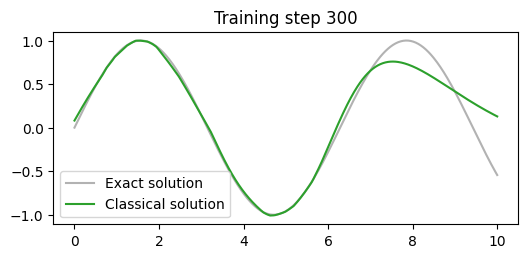

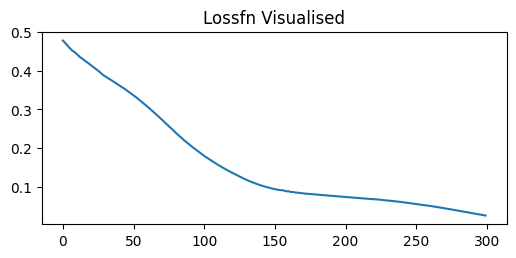

In [15]:
class SinusEstimator(torch.nn.Module):

    def __init__(self, N_INPUT: int, N_OUTPUT: int):
        super(SinusEstimator,self).__init__()
        self.layers = torch.nn.Sequential(
            torch.nn.Linear(N_INPUT, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64,32),
            torch.nn.ReLU(),
            torch.nn.Linear(32,16),
            torch.nn.Tanh(),
            torch.nn.Linear(16,N_OUTPUT)
        )


    def forward(self, x):
        x = self.layers(x)
        return x

model = SinusEstimator(1,1)

learning_rate=0.001
optimiser = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = torch.nn.MSELoss()

losses = []

def callback(model, loss):
    losses.append(loss.item())

    clear_output(wait=True)
    prediction = model(x).detach()
    plt.figure(figsize=(6,2.5))
    plt.plot(x[:,0].detach(), torch.sin(x)[:,0].detach(), label="Exact solution", color="tab:grey", alpha=0.6)
    plt.plot(x[:,0].detach(), prediction[:,0], label="Classical solution", color="tab:green")
    plt.title(f"Training step {len(losses)}")
    plt.legend()
    plt.show()

    plt.figure(figsize=(6,2.5))
    plt.title('Lossfn Visualised')
    plt.plot(losses)
    plt.show()


def train(X,Y, model, optimiser, epochs, lossfn, callback = None):
    for epoch in range(epochs):
        model.train()
        prediction = model(X)
        loss = lossfn(prediction, Y)

        optimiser.zero_grad()
        loss.backward()
        optimiser.step()
        model.eval()
        if callback != None:
            callback(model, loss)

x_train = x.requires_grad_(True)

train(x_train, y, model, optimiser, 300, criterion, callback)

QNN

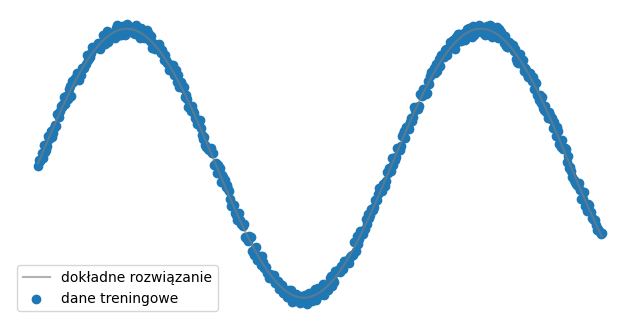

In [16]:
import torch

torch.manual_seed(123)

X_cont = torch.linspace(0,10,500).view(-1,1)
y_cont = torch.sin(X_cont)
y_cont_noise = y_cont + 0.1*(torch.rand(500).view(-1,1)-0.5)

# wyktres danych
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(X_cont, y_cont.view(-1,1), color="tab:grey", alpha=0.6, label="dokładne rozwiązanie")
plt.scatter(X_cont, y_cont_noise, label="dane treningowe")
plt.axis("off")
plt.legend()
plt.show()

In [17]:
def mse(y_true, y_pred) -> torch.Tensor:
    return torch.mean((y_true - y_pred)**2)

def train(X, Y, model, optimiser, iteration, lossfn, callback = None):
    """ Dodatkowa funkcja pozwalająca wykonać trenowanie naszej sieci neuronowej"""
    for i in range(iteration):
        optimiser.zero_grad()
        prediction = model(X)
        loss = lossfn(Y, prediction)
        loss.backward()
        optimiser.step()
        if callback is not None: 
            callback(model, loss)

losses = []

def callback(model, loss):
    losses.append(loss.item())
    x = torch.linspace(0,10,500).view(-1,1)
    clear_output(wait=True)
    prediction = model(x).detach()
    plt.figure(figsize=(6,2.5))
    plt.plot(x[:,0].detach(), torch.sin(x)[:,0].detach(), label="Exact solution", color="tab:grey", alpha=0.6)
    plt.plot(x[:,0].detach(), prediction[:,0], label="QML solution", color="tab:green")
    plt.title(f"Training step {len(losses)}")
    plt.legend()
    plt.show()

    plt.figure(figsize=(6,2.5))
    plt.title('Lossfn Visualised')
    plt.plot(losses)
    plt.show()

In [19]:
import pennylane as qml

n_qubits = 2
dev = qml.device("default.qubit", wires=n_qubits)
# NASZ kwantowy PQC - parametryzowany obwód kwantowy dla jednej warstwy ukrytej
@qml.qnode(dev)
def qnode(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits))
    qml.BasicEntanglerLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]

n_layers = 5

weight_shapes = {"weights": (n_layers, n_qubits)}

qlayer = qml.qnn.TorchLayer(qnode, weight_shapes)

In [18]:
class QN(torch.nn.Module):
    '''Classical -> Quantum -> Classical'''

    def __init__(self, n_input: int, n_output: int, quanutm_layer):
        super().__init__()

        self.layers = torch.nn.Sequential(
            torch.nn.Linear(n_input, n_qubits),
            quanutm_layer,
            torch.nn.Linear(n_qubits, n_output)
        )
        

    def forward(self, x):
        return  self.layers(x)

In [20]:
reg_qmodel = QN(1, 1, qlayer)
print(reg_qmodel)

QN(
  (layers): Sequential(
    (0): Linear(in_features=1, out_features=2, bias=True)
    (1): <Quantum Torch Layer: func=qnode>
    (2): Linear(in_features=2, out_features=1, bias=True)
  )
)


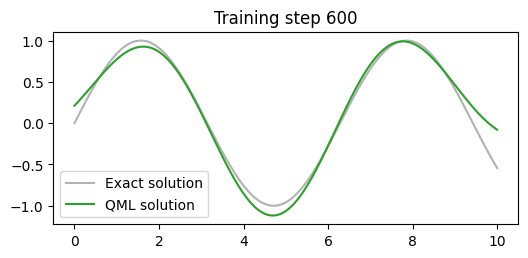

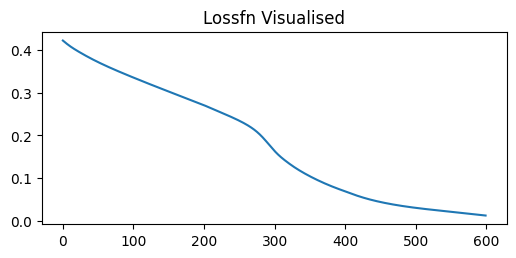

In [23]:
from IPython.display import clear_output 

learning_rate=1e-3
optimiser = torch.optim.Adam(reg_qmodel.parameters(), lr=learning_rate)

train(X_cont, y_cont_noise, reg_qmodel, optimiser, 200, mse, callback)

In [24]:
batches = torch.utils.data.DataLoader(
    list(zip(X_cont, y_cont_noise)), batch_size=10, shuffle=True, drop_last=True
)

In [25]:
def train_batch(data_loader, model, optimiser, iteration, lossfn, callback = None):
    """ Dodatkowa funkcja pozwalająca wykonać trenowanie naszej sieci neuronowej"""
    for i in range(iteration):
        for X, Y in data_loader:
            optimiser.zero_grad()
            prediction = model(X)
            loss = lossfn(Y, prediction)
            loss.backward()
            optimiser.step()
            if callback is not None: 
                callback(model, loss)

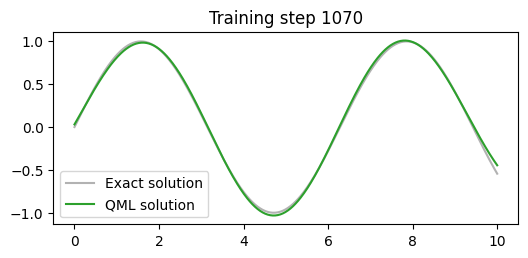

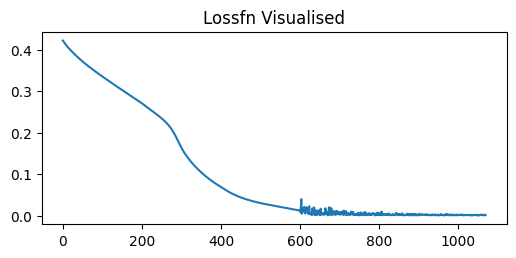

KeyboardInterrupt: 

In [26]:
train_batch(batches, reg_qmodel, optimiser, 10, mse, callback)

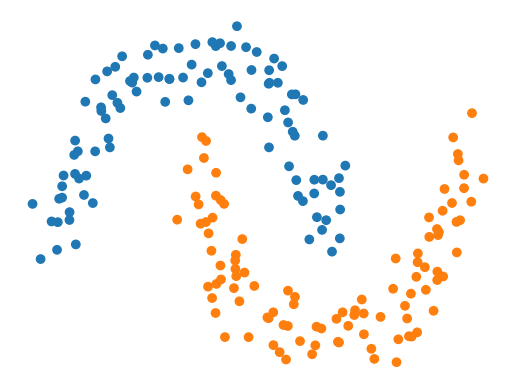

In [27]:
import torch
import pennylane.numpy as np
from sklearn.datasets import make_moons

torch.manual_seed(123)


X, y = make_moons(n_samples=200, noise=0.1)

# create torch

X = torch.from_numpy(X).to(torch.float32)

y_ = torch.from_numpy(y).view(-1,1)


c = ["#1f77b4" if y_ == 0 else "#ff7f0e" for y_ in y]  # kolorowanie
plt.axis("off")
plt.scatter(X[:, 0], X[:, 1], c=c)
plt.show()


y_hot = torch.scatter(torch.zeros((200, 2)), 1, y_, 1).to(torch.float32)

![](model1.png)

In [28]:
class QN2(torch.nn.Module):
    '''Classical -> Quantum -> Classical'''

    def __init__(self, quanutm_layer):
        super().__init__()

        self.layers = torch.nn.Sequential(
            torch.nn.Linear(2, 2),
            quanutm_layer,
            torch.nn.Linear(2, 2),
            torch.nn.Softmax(dim=1)
        )
        

    def forward(self, x):
        return  self.layers(x)

In [29]:
qclassifier = QN2(qlayer)
print(qclassifier)

QN2(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=2, bias=True)
    (1): <Quantum Torch Layer: func=qnode>
    (2): Linear(in_features=2, out_features=2, bias=True)
    (3): Softmax(dim=1)
  )
)


In [30]:
opt = torch.optim.SGD(qclassifier.parameters(), lr=0.2)
loss = torch.nn.L1Loss()

In [31]:
batch_size = 5
batches = 200 // batch_size

data_loader = torch.utils.data.DataLoader(
    list(zip(X, y_hot)), batch_size=5, shuffle=True, drop_last=True
)

epochs = 6

for epoch in range(epochs):

    running_loss = 0

    for xs, ys in data_loader:
        opt.zero_grad()

        loss_evaluated = loss(qclassifier(xs), ys)
        loss_evaluated.backward()

        opt.step()

        running_loss += loss_evaluated

    avg_loss = running_loss / batches
    print("Average loss over epoch {}: {:.4f}".format(epoch + 1, avg_loss))

y_pred = qclassifier(X)
predictions = torch.argmax(y_pred, axis=1).detach().numpy()

correct = [1 if p == p_true else 0 for p, p_true in zip(predictions, y)]
accuracy = sum(correct) / len(correct)
print(f"Accuracy: {accuracy * 100}%")

Average loss over epoch 1: 0.3778
Average loss over epoch 2: 0.2468
Average loss over epoch 3: 0.1999
Average loss over epoch 4: 0.1813
Average loss over epoch 5: 0.1701
Average loss over epoch 6: 0.1547
Accuracy: 88.5%


![](model2.png)

In [32]:
class HybridModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.clayer_1 = torch.nn.Linear(2, 4)
        self.qlayer_1 = qml.qnn.TorchLayer(qnode, weight_shapes)
        self.qlayer_2 = qml.qnn.TorchLayer(qnode, weight_shapes)
        self.clayer_2 = torch.nn.Linear(4, 2)
        self.softmax = torch.nn.Softmax(dim=1)

    def forward(self, x):
        x = self.clayer_1(x)
        x_1, x_2 = torch.split(x, 2, dim=1)
        x_1 = self.qlayer_1(x_1)
        x_2 = self.qlayer_2(x_2)
        x = torch.cat([x_1, x_2], axis=1)
        x = self.clayer_2(x)
        return self.softmax(x)

model = HybridModel()

In [33]:
opt = torch.optim.SGD(model.parameters(), lr=0.2)
epochs = 6

for epoch in range(epochs):

    running_loss = 0

    for xs, ys in data_loader:
        opt.zero_grad()

        loss_evaluated = loss(model(xs), ys)
        loss_evaluated.backward()

        opt.step()

        running_loss += loss_evaluated

    avg_loss = running_loss / batches
    print("Average loss over epoch {}: {:.4f}".format(epoch + 1, avg_loss))

y_pred = model(X)
predictions = torch.argmax(y_pred, axis=1).detach().numpy()

correct = [1 if p == p_true else 0 for p, p_true in zip(predictions, y)]
accuracy = sum(correct) / len(correct)
print(f"Accuracy: {accuracy * 100}%")

Average loss over epoch 1: 0.4337
Average loss over epoch 2: 0.2621
Average loss over epoch 3: 0.1872
Average loss over epoch 4: 0.1628
Average loss over epoch 5: 0.1481
Average loss over epoch 6: 0.1583
Accuracy: 87.5%
